# Analysis 01:

* Understanding Data,
* Data Cleaning,
* Finding Data Distribution,
* Finding Rage of Data,
* Finding Outliers,
* Finding Multico-llinearity, etc.

In [1]:
# Suppressing Warnings:
import warnings
warnings.filterwarnings('ignore')

# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)

%matplotlib inline
sns.set()

In [2]:
data = pd.read_csv("../Raw Data/data.csv")
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Understand Data:

In [3]:
data.shape

(30000, 25)

In [4]:
# Convert the column header in lower case:
data.columns = data.columns.str.lower()
data.columns = data.columns.str.replace(' ', '')

# Convert string values in lowe case:
data = data.applymap(lambda s: s.lower() if type(s) == str else s)
data = data.applymap(lambda s: s.strip() if type(s) == str else s)
data.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
# rename the output feature:

data.rename(columns={'default.payment.next.month': 'default',
                     'pay_0': 're_pay_september', 'pay_2': 're_pay_august', 'pay_3': 're_pay_july', 'pay_4': 're_pay_june', 'pay_5': 're_pay_may', 'pay_6': 're_pay_april',
                     'bill_amt1': 'bill_amt_september', 'bill_amt2': 'bill_amt_august', 'bill_amt3': 'bill_amt_july', 'bill_amt4': 'bill_amt_june', 'bill_amt5': 'bill_amt_may', 'bill_amt6': 'bill_amt_april',
                     'pay_amt1': 'pay_amt_september', 'pay_amt2': 'pay_amt_august', 'pay_amt3': 'pay_amt_july', 'pay_amt4': 'pay_amt_june', 'pay_amt5': 'pay_amt_may', 'pay_amt6': 'pay_amt_april', 
                    }, inplace = True)

data.columns

Index(['id', 'limit_bal', 'sex', 'education', 'marriage', 'age',
       're_pay_september', 're_pay_august', 're_pay_july', 're_pay_june',
       're_pay_may', 're_pay_april', 'bill_amt_september', 'bill_amt_august',
       'bill_amt_july', 'bill_amt_june', 'bill_amt_may', 'bill_amt_april',
       'pay_amt_september', 'pay_amt_august', 'pay_amt_july', 'pay_amt_june',
       'pay_amt_may', 'pay_amt_april', 'default'],
      dtype='object')

In [6]:
# drop the "id" column:

data.drop(columns=['id'], axis=1, inplace=True)

In [7]:
data.dtypes

limit_bal             float64
sex                     int64
education               int64
marriage                int64
age                     int64
re_pay_september        int64
re_pay_august           int64
re_pay_july             int64
re_pay_june             int64
re_pay_may              int64
re_pay_april            int64
bill_amt_september    float64
bill_amt_august       float64
bill_amt_july         float64
bill_amt_june         float64
bill_amt_may          float64
bill_amt_april        float64
pay_amt_september     float64
pay_amt_august        float64
pay_amt_july          float64
pay_amt_june          float64
pay_amt_may           float64
pay_amt_april         float64
default                 int64
dtype: object

In [8]:
data.isnull().sum()

limit_bal             0
sex                   0
education             0
marriage              0
age                   0
re_pay_september      0
re_pay_august         0
re_pay_july           0
re_pay_june           0
re_pay_may            0
re_pay_april          0
bill_amt_september    0
bill_amt_august       0
bill_amt_july         0
bill_amt_june         0
bill_amt_may          0
bill_amt_april        0
pay_amt_september     0
pay_amt_august        0
pay_amt_july          0
pay_amt_june          0
pay_amt_may           0
pay_amt_april         0
default               0
dtype: int64

## Data Cleaning:

In [9]:
# how many unique categories present in data:

for col in data.columns:
    print(f"{col}:  {len(data[col].unique())} unique categories present.")

limit_bal:  81 unique categories present.
sex:  2 unique categories present.
education:  7 unique categories present.
marriage:  4 unique categories present.
age:  56 unique categories present.
re_pay_september:  11 unique categories present.
re_pay_august:  11 unique categories present.
re_pay_july:  11 unique categories present.
re_pay_june:  11 unique categories present.
re_pay_may:  10 unique categories present.
re_pay_april:  10 unique categories present.
bill_amt_september:  22723 unique categories present.
bill_amt_august:  22346 unique categories present.
bill_amt_july:  22026 unique categories present.
bill_amt_june:  21548 unique categories present.
bill_amt_may:  21010 unique categories present.
bill_amt_april:  20604 unique categories present.
pay_amt_september:  7943 unique categories present.
pay_amt_august:  7899 unique categories present.
pay_amt_july:  7518 unique categories present.
pay_amt_june:  6937 unique categories present.
pay_amt_may:  6897 unique categories pr

In [10]:
columns = ['sex', 'education', 'marriage', 're_pay_september', 're_pay_august', 're_pay_july', 're_pay_june',
           're_pay_may', 're_pay_april', 'default']

for col in columns:
    print(f"{col}: {sorted(data[col].unique())}  categories\n")

sex: [1, 2]  categories

education: [0, 1, 2, 3, 4, 5, 6]  categories

marriage: [0, 1, 2, 3]  categories

re_pay_september: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]  categories

re_pay_august: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]  categories

re_pay_july: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]  categories

re_pay_june: [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8]  categories

re_pay_may: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]  categories

re_pay_april: [-2, -1, 0, 2, 3, 4, 5, 6, 7, 8]  categories

default: [0, 1]  categories



In [11]:
# get value for unique categories:

for col in columns:
    print(f"{col}:  {data[col].value_counts().to_dict()}\n")

sex:  {2: 18112, 1: 11888}

education:  {2: 14030, 1: 10585, 3: 4917, 5: 280, 4: 123, 6: 51, 0: 14}

marriage:  {2: 15964, 1: 13659, 3: 323, 0: 54}

re_pay_september:  {0: 14737, -1: 5686, 1: 3688, -2: 2759, 2: 2667, 3: 322, 4: 76, 5: 26, 8: 19, 6: 11, 7: 9}

re_pay_august:  {0: 15730, -1: 6050, 2: 3927, -2: 3782, 3: 326, 4: 99, 1: 28, 5: 25, 7: 20, 6: 12, 8: 1}

re_pay_july:  {0: 15764, -1: 5938, -2: 4085, 2: 3819, 3: 240, 4: 76, 7: 27, 6: 23, 5: 21, 1: 4, 8: 3}

re_pay_june:  {0: 16455, -1: 5687, -2: 4348, 2: 3159, 3: 180, 4: 69, 7: 58, 5: 35, 6: 5, 1: 2, 8: 2}

re_pay_may:  {0: 16947, -1: 5539, -2: 4546, 2: 2626, 3: 178, 4: 84, 7: 58, 5: 17, 6: 4, 8: 1}

re_pay_april:  {0: 16286, -1: 5740, -2: 4895, 2: 2766, 3: 184, 4: 49, 7: 46, 6: 19, 5: 13, 8: 2}

default:  {0: 23364, 1: 6636}



In [12]:
# handle education & marriage feature:
data['education'] = data['education'].map({1:1, 2:2, 3:3, 4:4, 5:4, 6:4, 0:4})
# education:::: {1:graduate school, 2:university, 3:high school, 4:others}

data['marriage'] = data['marriage'].map({1:1, 2:2, 3:3, 0:3})
# marriage:::: {1:married, 2:single, 3:others}

print("education: ", data['education'].unique())
print("marriage: ", data['marriage'].unique())

education:  [2 1 3 4]
marriage:  [1 2 3]


In [13]:
# handle the re_pay_april, re_pay_may, re_pay_june, re_pay_july, re_pay_august, re_pay_september features:

dct = {-2:0, -1:0, 0:0, 1:1, 2:2, 3:3, 4:4, 5:5, 6:6, 7:7, 8:8}
# {0:no payment delay, 1:payment delay for one month, 2:payment delay for two month, 3:payment delay for three month,
#  4:payment delay for four month, 5:payment delay for five month, 6:payment delay for six month,
#  7:payment delay for seven month, 8:payment delay for eight month}


data['re_pay_april'] = data['re_pay_april'].map(dct)
data['re_pay_may'] = data['re_pay_may'].map(dct)
data['re_pay_june'] = data['re_pay_june'].map(dct)
data['re_pay_july'] = data['re_pay_july'].map(dct)
data['re_pay_august'] = data['re_pay_august'].map(dct)
data['re_pay_september'] = data['re_pay_september'].map(dct)

cols = ['re_pay_april', 're_pay_may', 're_pay_june', 're_pay_july', 're_pay_august', 're_pay_september']
for col in cols:
    print(f"{col}: {sorted(data[col].unique())}\n")

re_pay_april: [0, 2, 3, 4, 5, 6, 7, 8]

re_pay_may: [0, 2, 3, 4, 5, 6, 7, 8]

re_pay_june: [0, 1, 2, 3, 4, 5, 6, 7, 8]

re_pay_july: [0, 1, 2, 3, 4, 5, 6, 7, 8]

re_pay_august: [0, 1, 2, 3, 4, 5, 6, 7, 8]

re_pay_september: [0, 1, 2, 3, 4, 5, 6, 7, 8]



In [14]:
# get the range of ['bill_amt_september', 'bill_amt_august', 'bill_amt_july', 'bill_amt_june', 'bill_amt_amy', 'bill_amt_april',
#                  'pay_amt_september', 'pay_amt_august', 'pay_amt_july', 'pay_amt_june', 'pay_amt_may', 'pay_amt_april']

cols = ['bill_amt_september', 'bill_amt_august', 'bill_amt_july', 'bill_amt_june', 'bill_amt_may', 'bill_amt_april', 
        'pay_amt_september', 'pay_amt_august', 'pay_amt_july', 'pay_amt_june', 'pay_amt_may', 'pay_amt_april']

for col in cols:
    print(f"{col} range: max: {max(data[col])},  min: {min(data[col])}\n")

bill_amt_september range: max: 964511.0,  min: -165580.0

bill_amt_august range: max: 983931.0,  min: -69777.0

bill_amt_july range: max: 1664089.0,  min: -157264.0

bill_amt_june range: max: 891586.0,  min: -170000.0

bill_amt_may range: max: 927171.0,  min: -81334.0

bill_amt_april range: max: 961664.0,  min: -339603.0

pay_amt_september range: max: 873552.0,  min: 0.0

pay_amt_august range: max: 1684259.0,  min: 0.0

pay_amt_july range: max: 896040.0,  min: 0.0

pay_amt_june range: max: 621000.0,  min: 0.0

pay_amt_may range: max: 426529.0,  min: 0.0

pay_amt_april range: max: 528666.0,  min: 0.0



## Check Data is Balanced or not:

{0: 23364, 1: 6636}


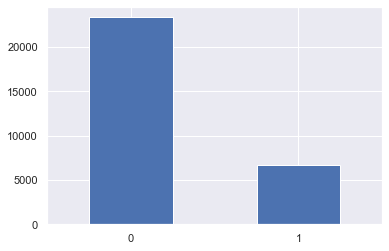

In [15]:
print(data['default'].value_counts().to_dict())
data['default'].value_counts().plot(kind='bar', rot=0)
plt.show()

## Check Data Ditribution:

In [16]:
def KDE_Plot(data, x, n):
    fig, ax = plt.subplots()
    sns.kdeplot(data=data, x=x, ax=n)
    plt.show()


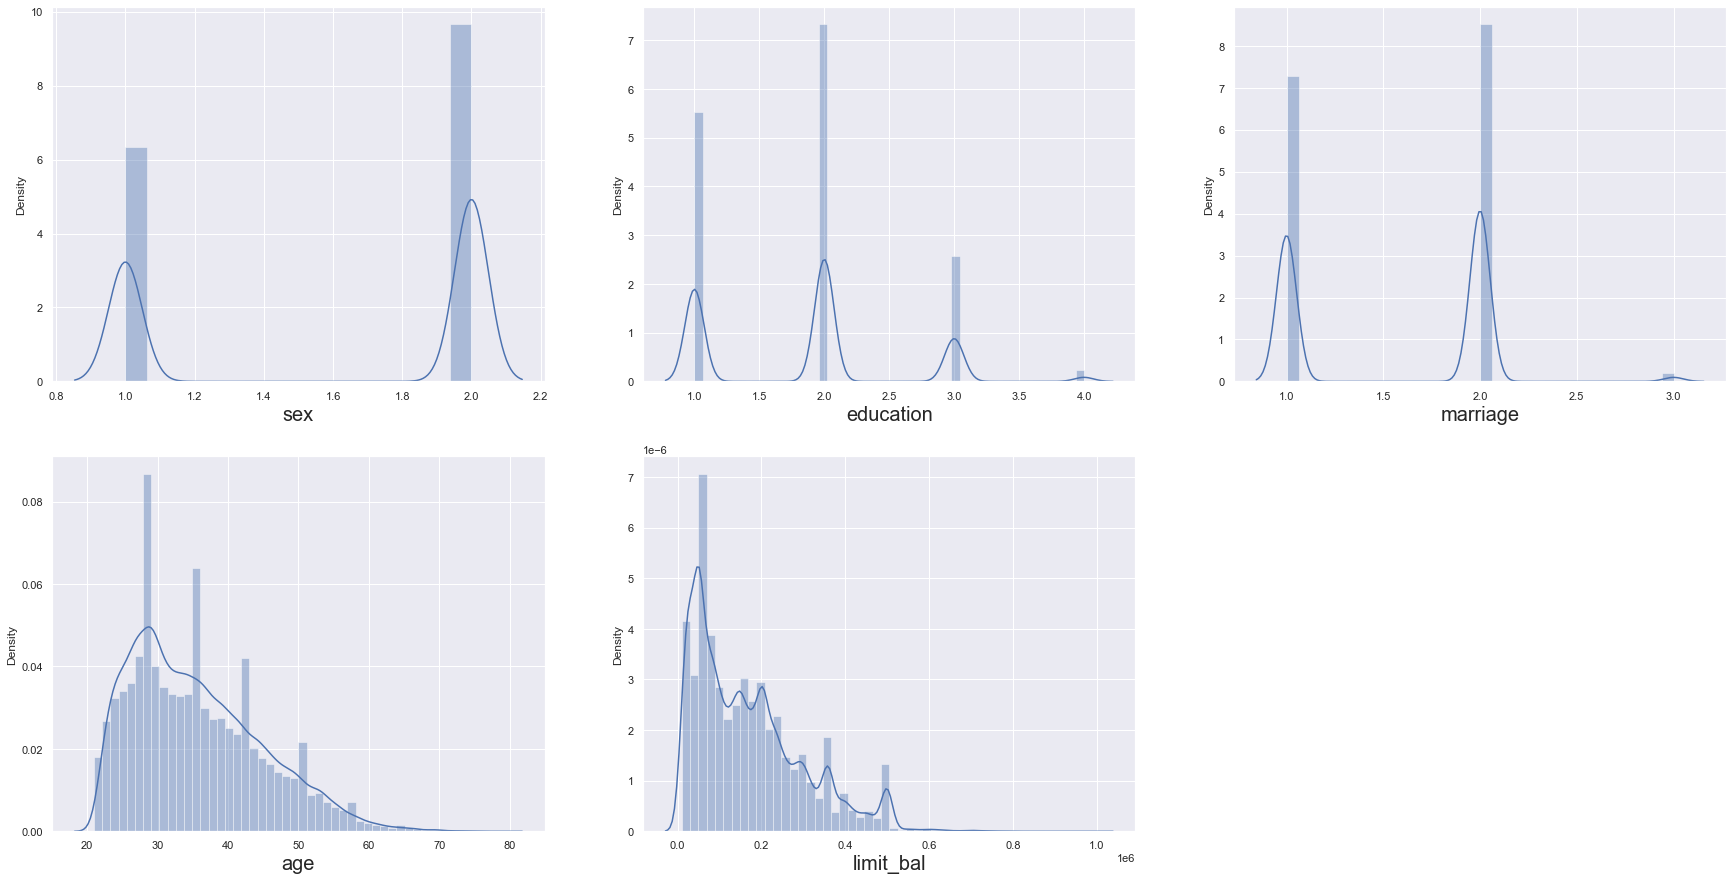

In [17]:
columns = ['sex', 'education', 'marriage', 'age', 'limit_bal']

plt.figure(figsize=(30,40), facecolor='white')
plotnumber = 1

for column in columns:
    if plotnumber<=15 :
        ax = plt.subplot(5, 3, plotnumber)
        ax = sns.distplot(data[column], kde_kws={'bw':0.1})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


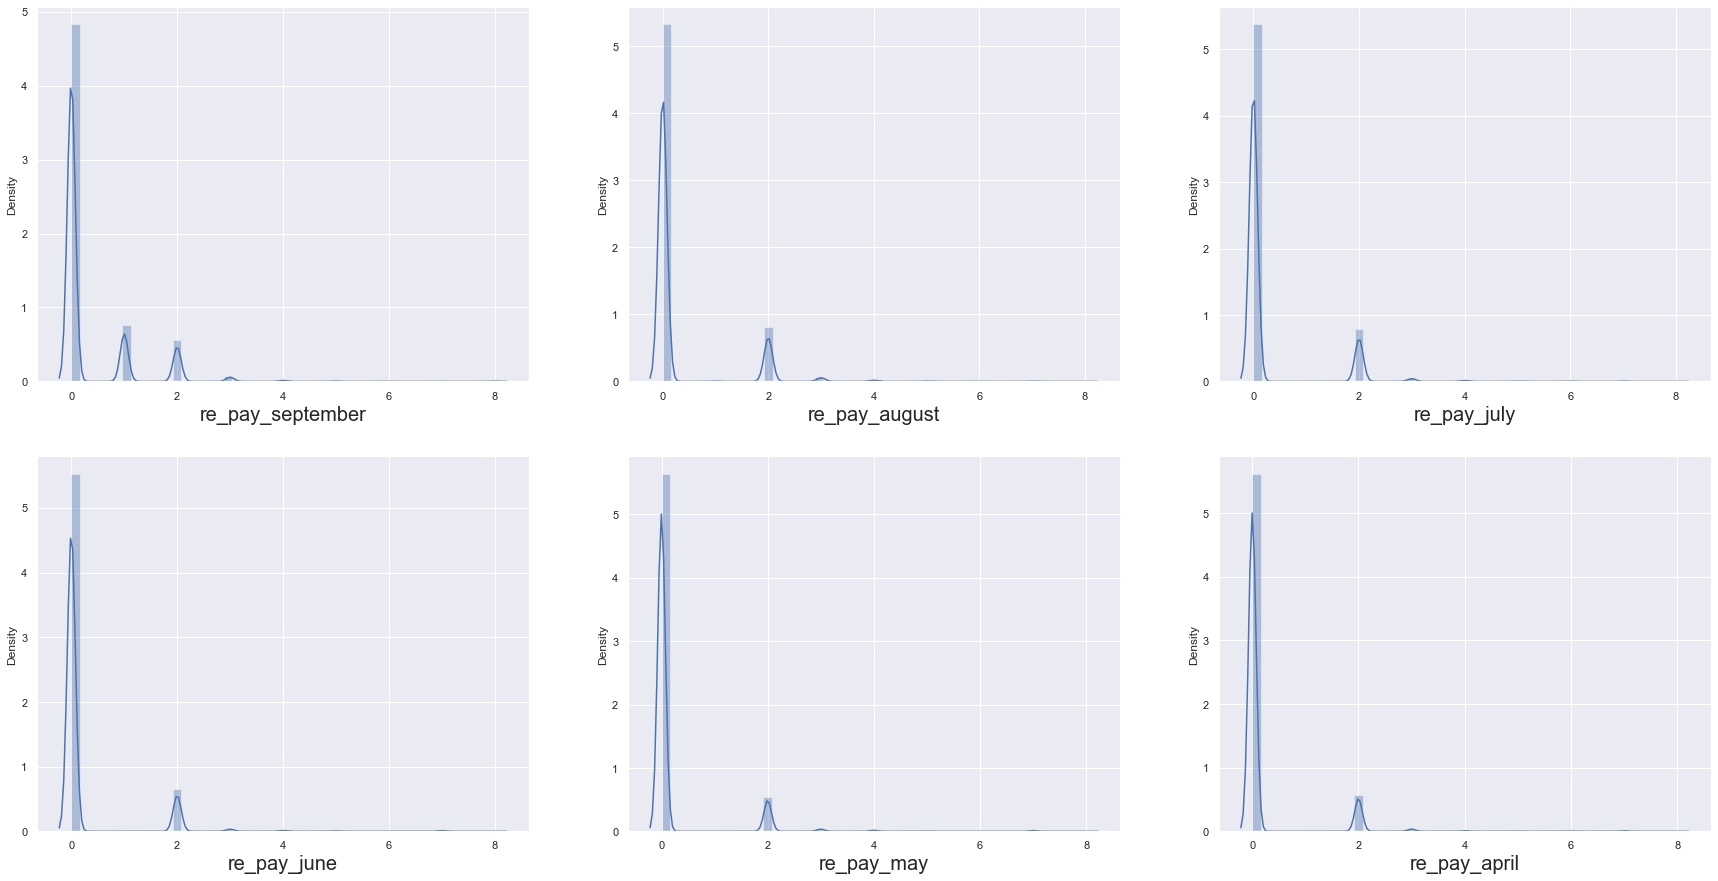

In [18]:
re_pay_cols = ['re_pay_september', 're_pay_august', 're_pay_july', 're_pay_june', 're_pay_may', 're_pay_april']

plt.figure(figsize=(30,40), facecolor='white')
plotnumber = 1
for column in re_pay_cols:
    if plotnumber<=15 :
        ax = plt.subplot(5, 3, plotnumber)
        ax = sns.distplot(data[column], kde_kws={'bw':0.1})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

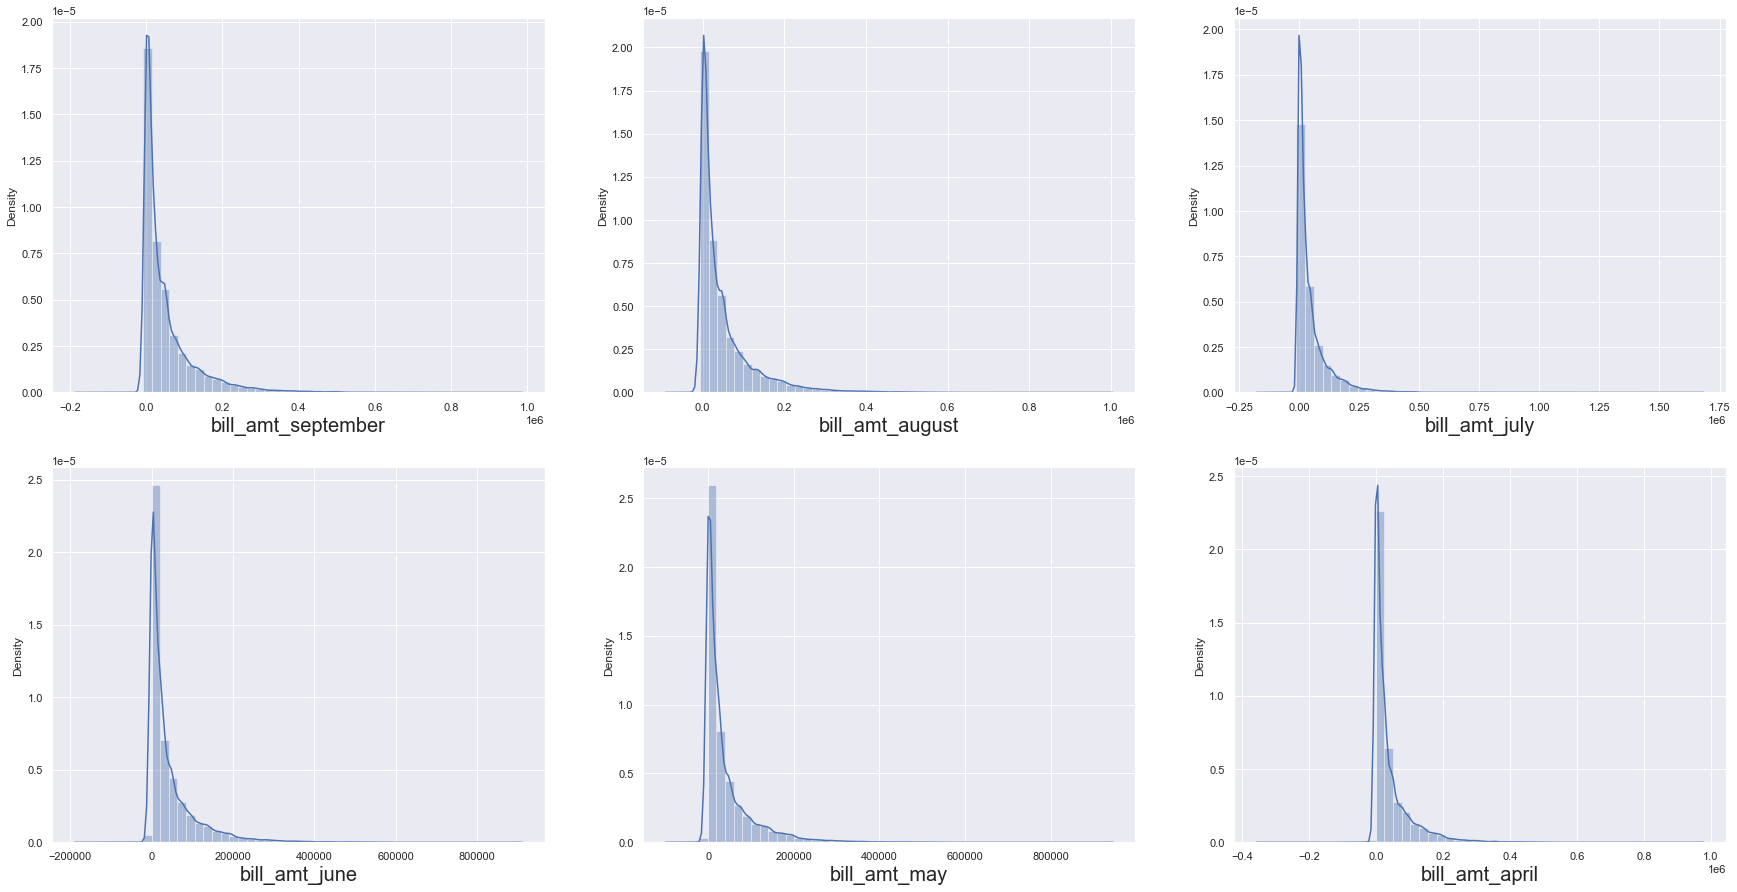

In [19]:
bill_amt_cols = ['bill_amt_september', 'bill_amt_august', 'bill_amt_july', 'bill_amt_june', 'bill_amt_may', 'bill_amt_april']

plt.figure(figsize=(30,40), facecolor='white')
plotnumber = 1
for column in bill_amt_cols:
    if plotnumber<=15 :
        ax = plt.subplot(5, 3, plotnumber)
        ax = sns.distplot(data[column], kde_kws={'bw':0.1})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

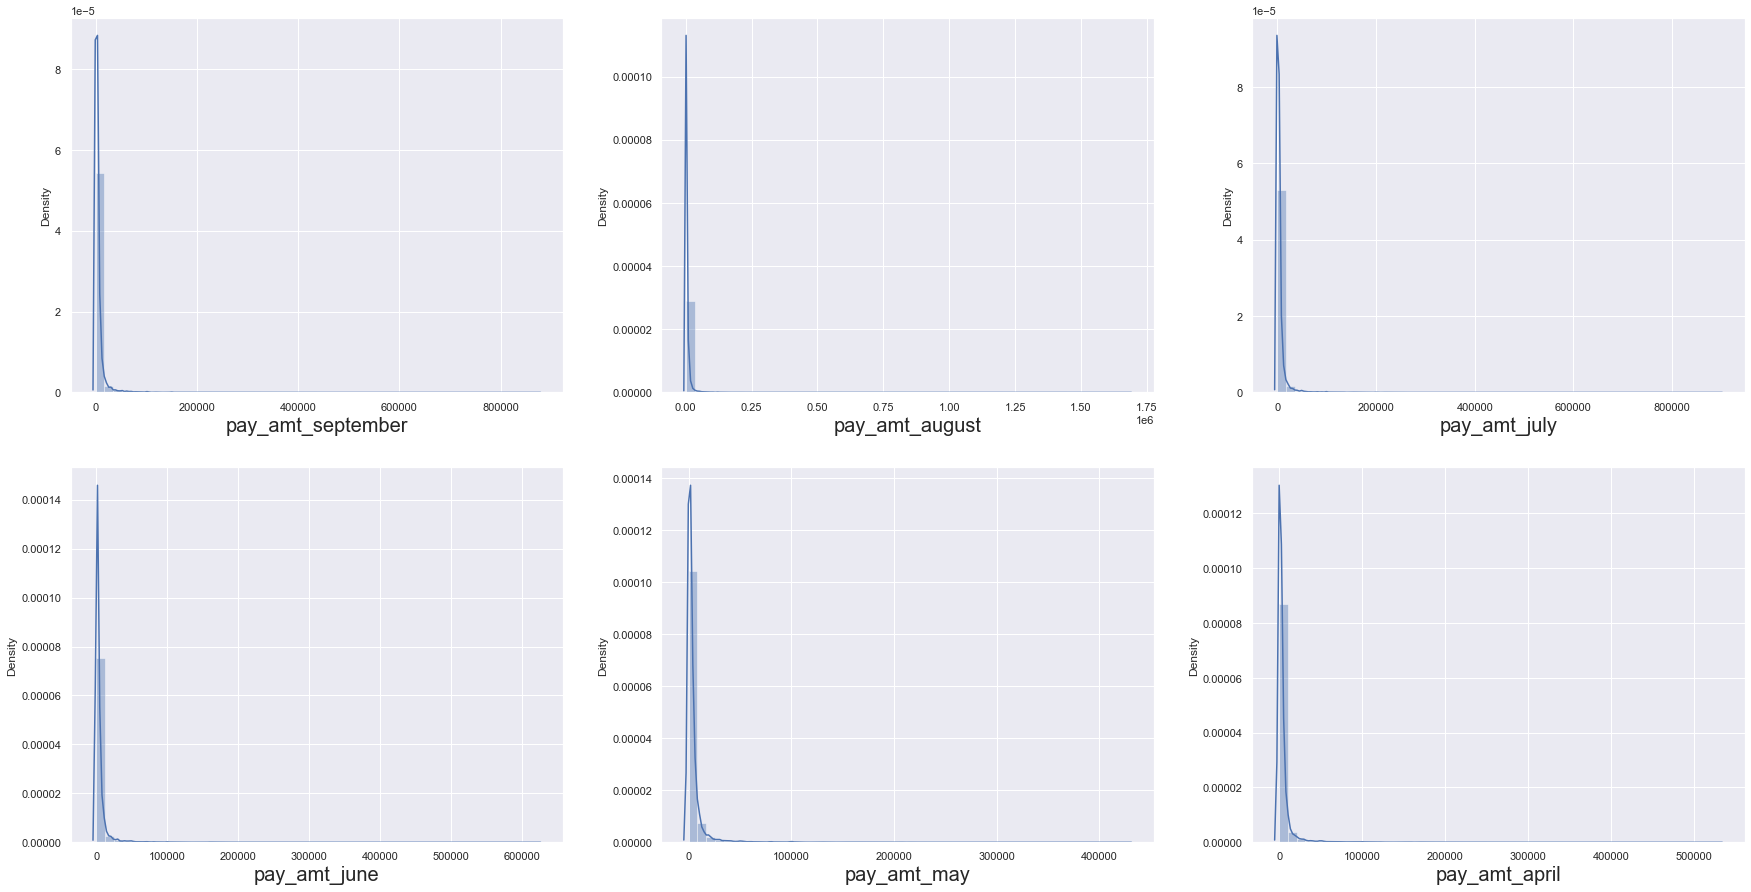

In [20]:
pay_amt_cols = ['pay_amt_september', 'pay_amt_august', 'pay_amt_july', 'pay_amt_june', 'pay_amt_may', 'pay_amt_april']

plt.figure(figsize=(30,40), facecolor='white')
plotnumber = 1
for column in pay_amt_cols:
    if plotnumber<=15 :
        ax = plt.subplot(5, 3, plotnumber)
        ax = sns.distplot(data[column], kde_kws={'bw':0.1})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

## Finding Outliers:

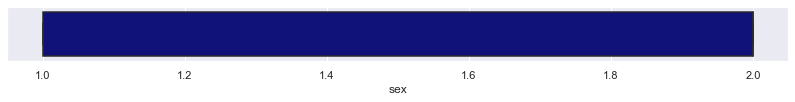

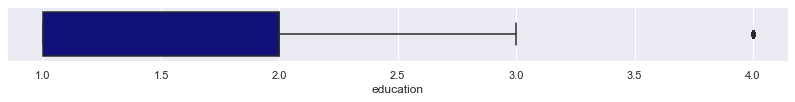

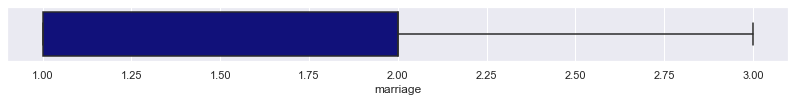

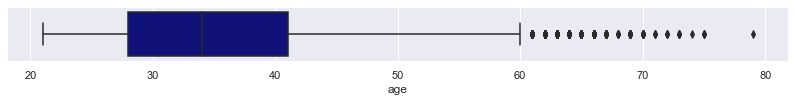

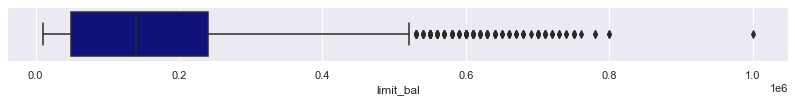

In [21]:
columns = ['sex', 'education', 'marriage', 'age', 'limit_bal']

for col in columns:
    plt.figure(figsize=(14,1))
    sns.boxplot(data=data, x=col, color='darkblue')
    plt.show()

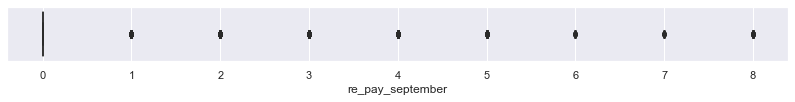

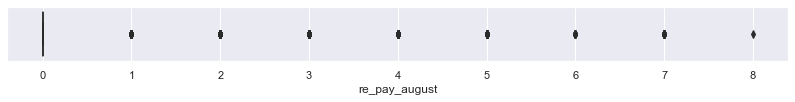

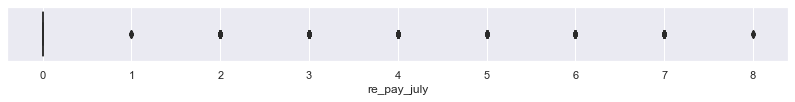

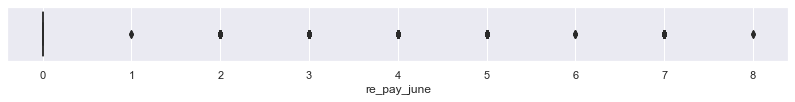

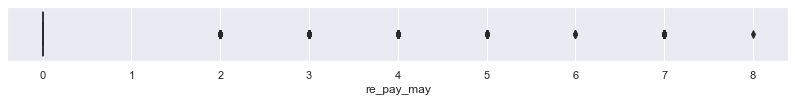

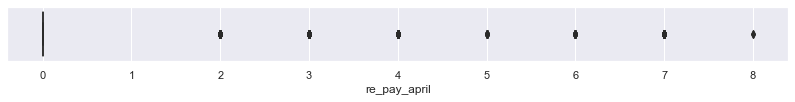

In [22]:
re_pay_cols = ['re_pay_september', 're_pay_august', 're_pay_july', 're_pay_june', 're_pay_may', 're_pay_april']

for col in re_pay_cols:
    plt.figure(figsize=(14,1))
    sns.boxplot(data=data, x=col, color='darkblue')
    plt.show()

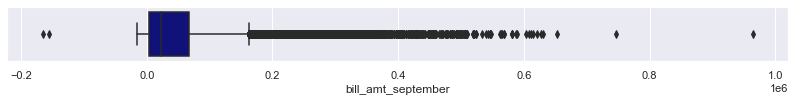

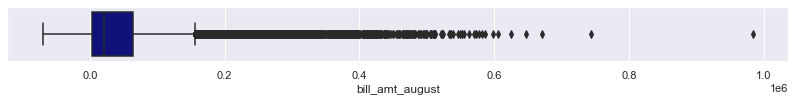

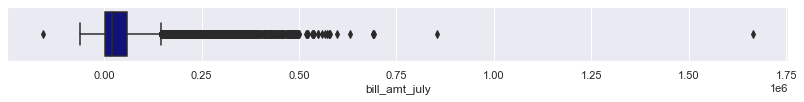

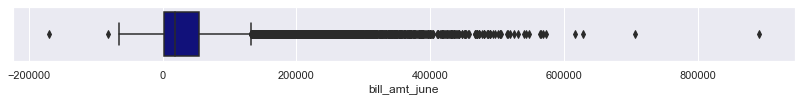

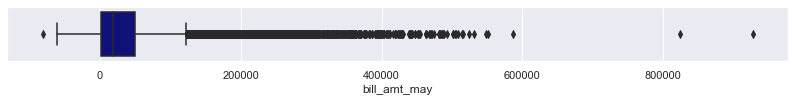

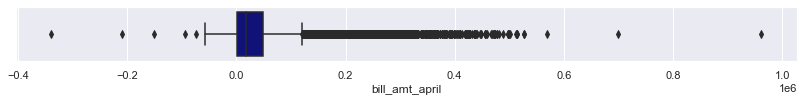

In [23]:
bill_amt_cols = ['bill_amt_september', 'bill_amt_august', 'bill_amt_july', 'bill_amt_june', 'bill_amt_may', 'bill_amt_april']

for col in bill_amt_cols:
    plt.figure(figsize=(14,1))
    sns.boxplot(data=data, x=col, color='darkblue')
    plt.show()

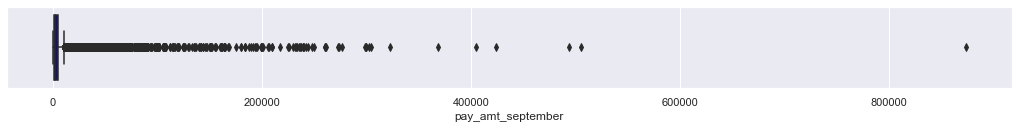

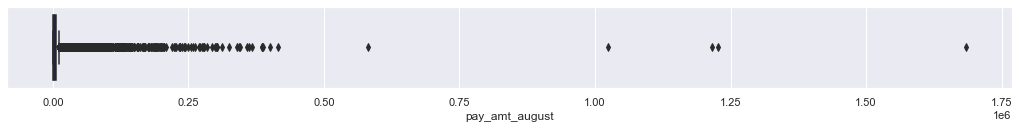

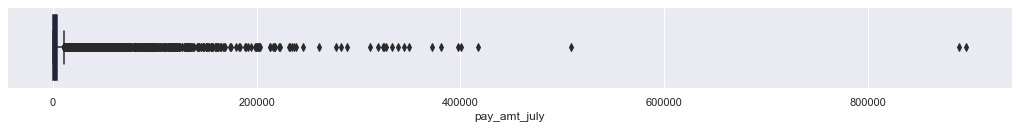

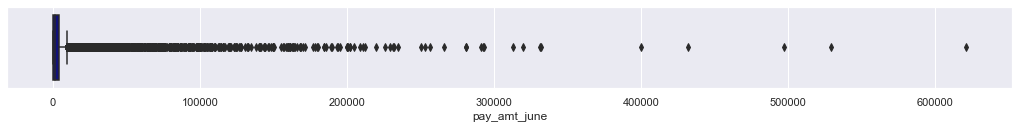

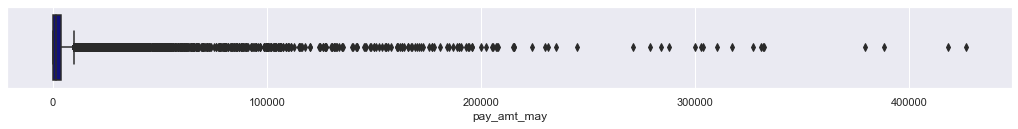

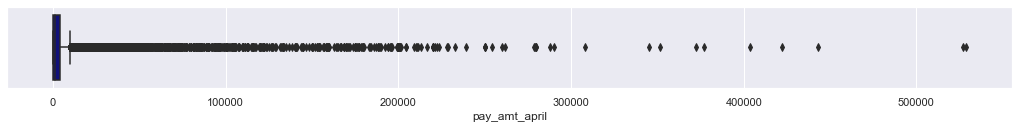

In [24]:
pay_amt_cols = ['pay_amt_september', 'pay_amt_august', 'pay_amt_july', 'pay_amt_june', 'pay_amt_may', 'pay_amt_april']

for col in pay_amt_cols:
    plt.figure(figsize=(18,1.5))
    sns.boxplot(data=data, x=col, color='darkblue')
    plt.show()

## Finding Multico-llinearity:

In [25]:
# Chek the VIF:

vif = pd.DataFrame()
vif["predictor"] = data.columns
vif["VIF Factor"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
vif

,predictor,VIF Factor
0,limit_bal,3.602003
1,sex,9.123912
2,education,7.380728
3,marriage,6.396450
4,age,11.383669
5,re_pay_september,2.601695
6,re_pay_august,3.038248
7,re_pay_july,2.891514
8,re_pay_june,3.312473
9,re_pay_may,3.561703


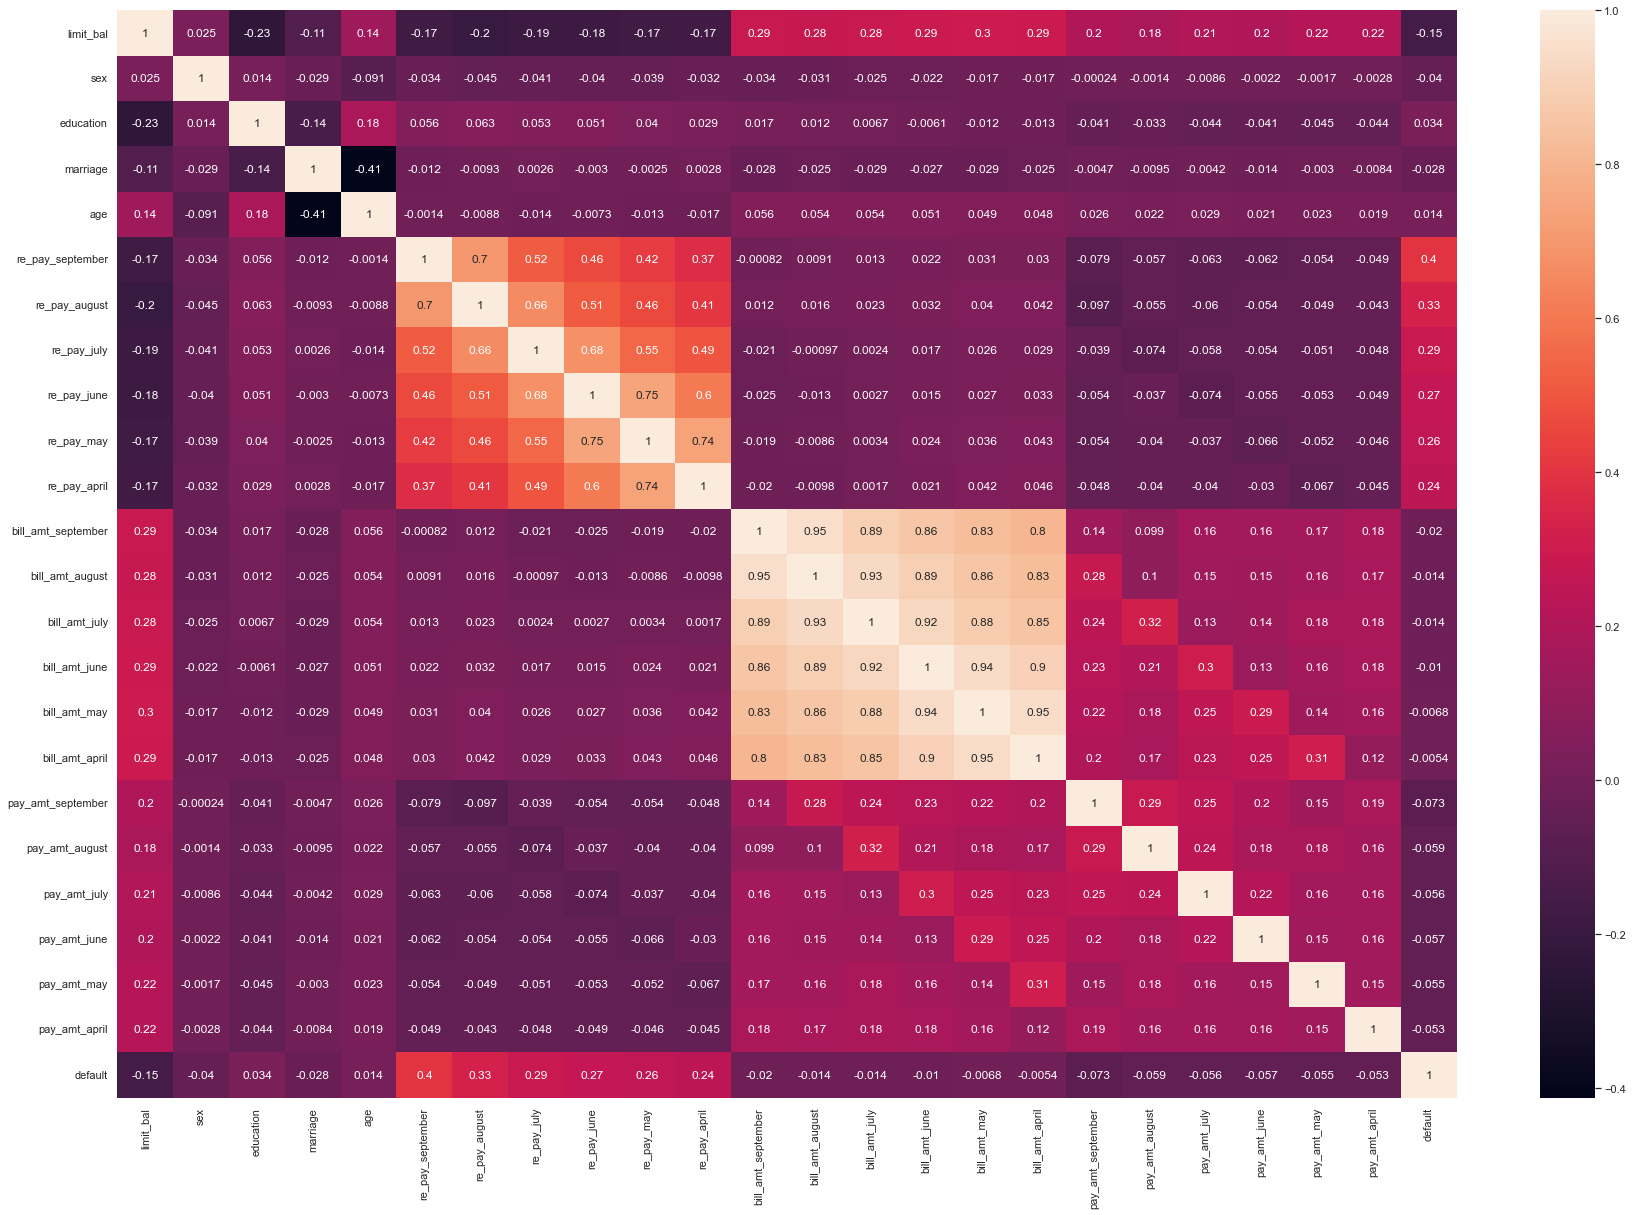

In [28]:
# Chek the Correlation:


plt.figure(figsize=(30,20))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [26]:
data.to_csv("../Raw Data/new_data.csv", index=False)

## Conclusion:

* **1.** all the features are neumeric, <br><br>
* **2.** data is not balnced {0: 23364, 1: 6636}, <br><br>
* **3.** data is not normally distributed (left skewed), <br><br>
* **4.** In this dataset all the features have outliers except sex, marriage feature, <br><br>
* **5.** Some features have high multi-collinearity like: sex, age, bill_amt_september, bill_amt_august, bill_amt_july, bill_amt_june, bill_amt_may, bill_amt_april, etc. <br><br>
* **6.** After handle the data save the data as new_data.csv format in Raw Data directory.

<br><br><br>



**Note:** We are not handle the outliers, Multicollinearity factors. And not scale the data here. It will be done in ML-Pipeline.